# Binary Classification Project with Unbalanced Dataset

**In this project I have two csv files, one is for training the model and one for testing. I need to develop a model that can help us to come up with the probability for majority and minority class.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Visualization of the dataset
df1=pd.read_csv('exercise_02_train.csv')

In [ ]:
#shape of the df
df1.shape

(40000, 101)

In [ ]:
# Check at first if we have any missing values
df1.isnull().sum().sum()

818

In [ ]:
#max amount of missing value in our df1 columns
Missing = df1.isna().sum()/(len(df1))*100
print("Column with lowest amount of missings contains {} % missings.".format(Missing.min()))
print("Column with highest amount of missings contains {} % missings.".format(Missing.max()))

Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 0.0375 % missings.


**The percentage of missing values in df1 columns were not numerous, so I will drop them all.**

In [ ]:
#Determine columns with missings
df1.loc[:, df1.isnull().any()].columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99'],
      dtype='object')

**looks like we have missing value in all columns of df1**

In [ ]:
#lets drop the missing values from our datasets
df1.dropna(inplace=True)

In [ ]:
df1.shape

(39182, 101)

In [ ]:
#check for any categorical columns in df1
cols = df1.columns
num_cols = df1._get_numeric_data().columns
list(set(cols) - set(num_cols))

['x45', 'x34', 'x68', 'x93', 'x35', 'x41']

**As can be seen there are 6 columns with categorical values are available**

**Columns X34,35,68,93. We need to encode them by get.dummies function**

**Columns X41,45. There are % and $ inside the cells and thats why we found them as categorical.**

In [ ]:
#Cleaning the X34,35,68,93
print(df1['x34'].unique())
print(df1['x35'].unique())
print(df1['x68'].unique())
print(df1['x93'].unique())

['Toyota' 'Honda' 'bmw' 'volkswagon' 'tesla' 'nissan' 'chrystler' 'ford'
 'mercades' 'chevrolet']
['wed' 'thurday' 'wednesday' 'thur' 'tuesday' 'monday' 'friday' 'fri']
['Jun' 'sept.' 'Oct' 'July' 'Aug' 'Apr' 'May' 'Mar' 'Nov' 'Feb' 'Dev'
 'January']
['asia' 'america' 'euorpe']


In [ ]:
#x35 need to rearrange
df1["x35"].replace({"wed": "wednesday", "thur": "thurday", "fri": "friday"}, inplace=True)

In [ ]:
#use get.dummies function for encoding the categorical values
df1 = pd.get_dummies(data = df1, columns = ['x34', 'x35', 'x68', 'x93'])

In [ ]:
#removing dollar sign from column x41
df1['x41'] = df1['x41'].str.replace('$', '').astype(float)

In [ ]:
#removing percentage sign from column x45
df1['x45'] = df1['x45'].str.replace('%', '').astype(float)

In [ ]:
df1["dependent"] = df1["y"]

In [ ]:
df1.drop(['y'], inplace=True, axis=1)

In [ ]:
df1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe,dependent
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,1,0,0,0,0,0,0,1,0,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,0,0,0,0,0,1,0,1,0,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,0,0,0,0,1,0,1,0,0,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,1,0,0,0,0,0,0,1,0,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df1.corr()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe,dependent
x0,1.000000,-0.218484,-0.156282,-0.146731,-0.261757,-0.078714,0.000105,-0.003964,0.110925,-0.003594,...,-0.100942,-0.078656,-0.136981,0.059919,0.108867,0.150035,-0.003411,0.002935,-0.000099,-0.065957
x1,-0.218484,1.000000,-0.025459,-0.032857,-0.019945,0.083369,-0.003246,0.004735,-0.112988,0.005602,...,0.015071,0.041255,0.044045,-0.012699,-0.026627,-0.038342,0.006459,-0.003355,-0.003566,0.103643
x2,-0.156282,-0.025459,1.000000,-0.089697,-0.067693,0.003510,0.006680,-0.002142,-0.000591,0.004686,...,0.066880,0.018834,0.063460,-0.035703,-0.067728,-0.088896,-0.001778,-0.001132,0.004485,0.088139
x3,-0.146731,-0.032857,-0.089697,1.000000,0.019363,-0.006893,-0.008622,0.004259,-0.023798,-0.005182,...,0.071132,0.050875,0.089833,-0.036193,-0.067031,-0.094722,-0.002673,0.000717,0.002620,-0.094680
x4,-0.261757,-0.019945,-0.067693,0.019363,1.000000,0.005555,-0.001393,-0.001745,0.072124,0.002550,...,-0.004541,0.013689,0.009049,-0.007848,-0.000622,-0.010242,-0.009434,0.007236,0.001228,-0.008274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x68_sept.,0.150035,-0.038342,-0.088896,-0.094722,-0.010242,0.009803,-0.000781,-0.003594,0.086612,-0.007332,...,-0.169128,-0.032223,-0.113382,-0.018864,-0.046754,1.000000,0.006898,-0.006953,0.001934,0.006291
x93_america,-0.003411,0.006459,-0.001778,-0.002673,-0.009434,-0.001090,0.003370,0.004743,-0.006255,0.008306,...,-0.006914,-0.003686,-0.000261,0.000951,0.004715,0.006898,1.000000,-0.810336,-0.056328,0.008155
x93_asia,0.002935,-0.003355,-0.001132,0.000717,0.007236,0.002490,0.000401,-0.003845,0.001455,-0.006724,...,0.003987,0.002555,0.000109,-0.000438,0.000249,-0.006953,-0.810336,1.000000,-0.539390,-0.004508
x93_euorpe,-0.000099,-0.003566,0.004485,0.002620,0.001228,-0.002675,-0.005527,-0.000263,0.006510,-0.000479,...,0.003143,0.000944,0.000189,-0.000620,-0.007201,0.001934,-0.056328,-0.539390,1.000000,-0.004038


In [ ]:
#There are 127 diffrent features, but we need to reduce the dimentionality of the data 
#by removing those features that doesnt provide that much information

#Correlation with output variable
cor = df1.corr()
cor_target = abs(cor["dependent"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values()

dfpred = df1[relevant_features.index.values]

In [ ]:
dfpred

,x1,x37,x41,x58,x70,x75,x97,dependent
0,74.425320,-10.839200,449.48,2.078396,41.040206,40.617107,-2.125570,0
1,24.320711,57.917006,-525.06,-2.696257,36.204784,-49.303165,-36.030599,1
2,-66.160459,-12.991058,-599.50,-2.417447,49.538602,-19.706659,26.212736,1
3,33.210943,37.658926,-220.71,4.443710,82.130387,-7.301283,19.221130,0
4,-26.717872,-59.497091,-1405.59,-2.421952,-19.154066,-2.751656,-5.703269,0
...,...,...,...,...,...,...,...,...
39995,63.861763,11.733697,-2113.20,9.469915,-30.688388,49.415653,-21.035463,0
39996,-88.026423,-1.972438,935.41,-8.679121,40.089671,-8.803315,-1.333318,0
39997,64.294604,-28.895908,338.20,-2.099754,-43.621345,68.031607,-5.452678,0
39998,-29.455176,-9.029036,-169.39,-8.545977,18.107577,2.375774,20.135669,0


In [ ]:
#defining dependent and independent variables
X = dfpred.iloc[:, :-1].values
y = dfpred.iloc[:, -1].values

In [ ]:
#Normalization
sc=StandardScaler()
x=sc.fit_transform(X)

In [ ]:
#Let's implement 3 diffrent classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
#accuracy of the classifiers without tunnig

for key, classifier in classifiers.items():
    classifier.fit(x, y)
    training_score = cross_val_score(classifier, x, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 82.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 81.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 75.0 % accuracy score


# Find the best parameter

In [ ]:
# Use GridSearchCV to find the best parameters.

#Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x, y)
log_reg = grid_log_reg.best_estimator_


#KNears best estimator
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x, y)
knears_neighbors = grid_knears.best_estimator_

#DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x, y)
tree_clf = grid_tree.best_estimator_

C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-tes

In [ ]:
# accuracy and recall based on best estimators

log_reg_score = cross_val_score(log_reg, x, y, cv=5, scoring='accuracy')
log_reg_recall = cross_val_score(log_reg, x, y, cv=5, scoring='recall')
print('Logistic Regression Cross Validation accuracy: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
print('Logistic Regression Cross Validation recall: ', round(log_reg_recall.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, x, y, cv=5, scoring='accuracy')
knears_score_recall = cross_val_score(knears_neighbors, x, y, cv=5, scoring='recall')
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
print('Knears Neighbors Cross Validation Score', round(knears_score_recall.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x, y, cv=5, scoring='accuracy')
tree_score_recall = cross_val_score(tree_clf, x, y, cv=5, scoring='recall')
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
print('DecisionTree Classifier Cross Validation Score', round(tree_score_recall.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation accuracy:  82.04%
Logistic Regression Cross Validation recall:  28.85%
Knears Neighbors Cross Validation Score 81.01%
Knears Neighbors Cross Validation Score 23.25%
DecisionTree Classifier Cross Validation Score 80.17%
DecisionTree Classifier Cross Validation Score 12.5%


**We have a good accuracy but a very bad recall. In other words, the model predicts well the true negative but badly the true positive. This is due to the unbalanced data. Lets apply random undersampling to make the data balance. I am going to consider 50% minority class and 50% majority class**

Text(0.5, 1.0, 'Class Distributions \n (0: No accident || 1: accident)')

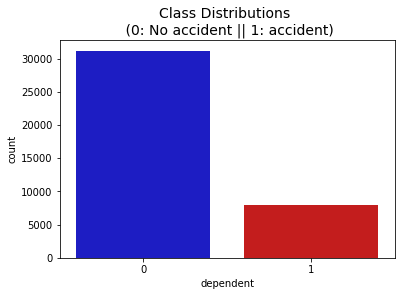

In [ ]:
#imbalanced data
colors = ["#0101DF", "#DF0101"]

sns.countplot('dependent', data=df1, palette=colors)
plt.title('Class Distributions \n (0: No accident || 1: accident)', fontsize=14)

In [ ]:
#lets make our dataset balance
df_1= df1[df1['dependent'] == 1]
df_0 = df1[df1['dependent'] == 0]

balanced_df=pd.concat([df_0.iloc[:df_1.shape[0],:], df_1]) # 50% of 0 50% of 1
balanced_df=balanced_df.sample(balanced_df.shape[0])

balanced_df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe,dependent
5632,2.341898,-30.506207,-27.939673,-3.413023,0.644538,19.858541,-4.890062,7.060795,-10.093390,-0.584804,...,0,0,0,0,0,0,0,1,0,0
8533,9.400499,20.093036,22.047442,0.363747,-34.346754,-16.930969,14.269300,-3.137979,-15.634431,1.661638,...,1,0,0,0,0,0,0,1,0,0
3461,-2.581860,21.100633,29.987554,-1.123336,-10.590672,-16.751599,-10.883603,-0.398871,-4.284934,-5.367186,...,0,0,0,0,0,0,0,1,0,1
23165,7.343586,-5.372281,-61.570623,-1.900518,-10.230765,13.179263,7.407237,-0.114064,-3.436136,2.908474,...,0,0,0,0,0,0,0,1,0,1
2525,0.899738,25.465650,-43.862205,-0.200567,-1.439579,27.291545,9.955198,-1.410723,-15.266531,-0.508082,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,21.209138,-27.714749,24.720043,1.034420,-21.831644,-11.092761,3.668053,-3.915528,-3.599257,-0.020990,...,0,0,0,0,0,1,0,1,0,1
16196,-26.063152,51.053721,109.108932,1.758557,26.870361,-6.518332,9.664408,15.065577,1.433051,1.150273,...,0,0,0,0,0,0,0,1,0,1
6663,6.176946,3.224787,79.291491,-0.912219,-31.876495,18.090395,4.904954,-12.377386,-16.802863,4.459321,...,0,0,0,0,0,1,0,1,0,0
21415,28.778754,-21.301771,-32.052868,1.460705,-10.072068,19.396735,0.364654,0.040774,-26.088268,0.826504,...,0,0,0,0,1,0,0,1,0,1


Text(0.5, 1.0, 'Class Distributions \n (0: No accident || 1: accident)')

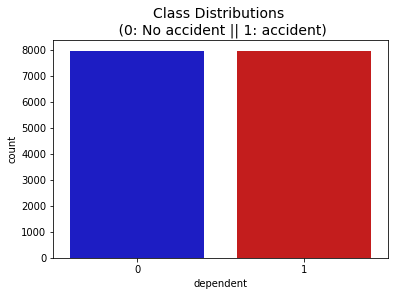

In [ ]:
#balanced data
colors = ["#0101DF", "#DF0101"]

sns.countplot('dependent', data=balanced_df, palette=colors)
plt.title('Class Distributions \n (0: No accident || 1: accident)', fontsize=14)

In [ ]:
#Correlation with output variable
cor = balanced_df.corr()
cor_target = abs(cor["dependent"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values()

dfpred = balanced_df[relevant_features.index.values]

In [ ]:
dfpred

,x1,x2,x3,x5,x10,x20,x21,x22,x33,x37,...,x73,x75,x78,x79,x83,x85,x96,x97,x99,dependent
5632,-30.506207,-27.939673,-3.413023,19.858541,-86.875647,0.003640,41.389960,87.042929,-5.640067,45.330522,...,40.881151,20.615232,-1.605192,-35.409911,1.154636,36.257851,-3.912497,-33.280921,1.284467,0
8533,20.093036,22.047442,0.363747,-16.930969,-4.852505,1.737856,28.967661,77.000176,-2.377054,41.567437,...,-11.697267,-8.918759,-8.634336,57.081723,5.342754,-25.399170,8.651768,-1.766345,-0.526032,0
3461,21.100633,29.987554,-1.123336,-16.751599,3.786722,16.802476,-22.622090,24.686648,0.016123,-24.231346,...,-25.892340,-37.761717,1.390277,-20.749920,-0.981127,-21.328386,-24.935859,44.049856,-1.484568,1
23165,-5.372281,-61.570623,-1.900518,13.179263,-39.503843,1.854998,-12.404893,-20.127922,-5.643627,5.984061,...,24.684419,-42.327945,-2.006549,-16.684458,11.947687,28.132576,-34.618253,-27.759254,0.094354,1
2525,25.465650,-43.862205,-0.200567,27.291545,-55.118966,-0.383934,-6.865923,-20.728290,-6.304919,-11.191012,...,9.267191,56.268463,2.890149,-13.844349,1.123736,-36.136721,37.885762,-3.781596,1.970603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,-27.714749,24.720043,1.034420,-11.092761,-59.711586,-18.295318,-4.071317,-23.339082,-5.364521,21.584645,...,-21.638387,-16.101341,3.212601,10.797591,8.801407,18.144028,-6.116260,-16.930609,-0.415506,1
16196,51.053721,109.108932,1.758557,-6.518332,-28.118554,-16.350501,-45.125592,-28.012390,-2.981930,-39.112791,...,6.134711,-59.591535,2.456997,-4.503880,5.662627,-1.446337,13.374964,12.420319,1.403669,1
6663,3.224787,79.291491,-0.912219,18.090395,57.758797,32.406733,9.697422,52.570274,4.793865,-26.144282,...,-34.117106,26.829676,0.250067,0.600720,-2.799914,-19.453914,-6.331658,0.467210,0.759307,0
21415,-21.301771,-32.052868,1.460705,19.396735,37.397261,17.543043,58.611508,-55.558027,1.304704,45.066049,...,47.791873,-13.462052,0.338621,-20.594125,-0.729124,20.480892,24.522073,13.454860,0.744973,1


In [ ]:
#defining dependent and independent variables
X = dfpred.iloc[:, :-1].values
y = dfpred.iloc[:, -1].values

In [ ]:
#Normalization
sc=StandardScaler()
x=sc.fit_transform(X)

In [ ]:
#Let's implement 3 diffrent classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
#accuracy of the classifiers without tunnig

for key, classifier in classifiers.items():
    classifier.fit(x, y)
    training_score = cross_val_score(classifier, x, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 81.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 74.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.

#Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x, y)
log_reg = grid_log_reg.best_estimator_


#KNears best estimator
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x, y)
knears_neighbors = grid_knears.best_estimator_

#DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x, y)
tree_clf = grid_tree.best_estimator_

C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Amir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-tes

In [ ]:
# accuracy and recall based on best estimators on balanced dataset

log_reg_score = cross_val_score(log_reg, x, y, cv=5, scoring='accuracy')
log_reg_recall = cross_val_score(log_reg, x, y, cv=5, scoring='recall')
print('Logistic Regression Cross Validation accuracy: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
print('Logistic Regression Cross Validation recall: ', round(log_reg_recall.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, x, y, cv=5, scoring='accuracy')
knears_score_recall = cross_val_score(knears_neighbors, x, y, cv=5, scoring='recall')
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
print('Knears Neighbors Cross Validation recall', round(knears_score_recall.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x, y, cv=5, scoring='accuracy')
tree_score_recall = cross_val_score(tree_clf, x, y, cv=5, scoring='recall')
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
print('DecisionTree Classifier Cross Validation recall', round(tree_score_recall.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation accuracy:  81.02%
Logistic Regression Cross Validation recall:  81.07%
Knears Neighbors Cross Validation Score 92.29%
Knears Neighbors Cross Validation recall 88.9%
DecisionTree Classifier Cross Validation Score 67.4%
DecisionTree Classifier Cross Validation recall 67.62%


**As can be seen from the results our recall increased and both logestic regression and knearest neighbors working properly with available dataset.**

# Applying Neural Network Model

In [ ]:
#developing NN model by using Sequential function and three dense layer
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
X = dfpred.iloc[:, :-1].values
y = dfpred.iloc[:, -1].values

In [ ]:
#Normalization
sc=StandardScaler()
x=sc.fit_transform(X)

In [ ]:
#for checking how my NN model is working, I have splited my x into test and train but the test x here is working as validation set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
#defining early_stoping layer to find the optimum number of epoch
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
399/399 [==============================] - 1s 2ms/step - loss: 0.6886 - val_loss: 0.5049
Epoch 2/600
399/399 [==============================] - 0s 1ms/step - loss: 0.5225 - val_loss: 0.3805
Epoch 3/600
399/399 [==============================] - 1s 1ms/step - loss: 0.4502 - val_loss: 0.3347
Epoch 4/600
399/399 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.3083
Epoch 5/600
399/399 [==============================] - 0s 1ms/step - loss: 0.3917 - val_loss: 0.2908
Epoch 6/600
399/399 [==============================] - 0s 1ms/step - loss: 0.3715 - val_loss: 0.2711
Epoch 7/600
399/399 [==============================] - 1s 1ms/step - loss: 0.3493 - val_loss: 0.2531
Epoch 8/600
399/399 [==============================] - 1s 1ms/step - loss: 0.3353 - val_loss: 0.2404
Epoch 9/600
399/399 [==============================] - 1s 1ms/step - loss: 0.3294 - val_loss: 0.2302
Epoch 10/600
399/399 [==============================] - 1s 1ms/step - loss: 0.3149 - val_lo

399/399 [==============================] - 0s 1ms/step - loss: 0.2649 - val_loss: 0.1774
Epoch 82/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2646 - val_loss: 0.1766
Epoch 83/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2627 - val_loss: 0.1781
Epoch 84/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2634 - val_loss: 0.1793
Epoch 85/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2632 - val_loss: 0.1775
Epoch 86/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2633 - val_loss: 0.1792
Epoch 87/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2580 - val_loss: 0.1754
Epoch 88/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2554 - val_loss: 0.1751
Epoch 89/600
399/399 [==============================] - 1s 1ms/step - loss: 0.2649 - val_loss: 0.1777
Epoch 90/600
399/399 [==============================] - 0s 1ms/step - loss: 0.2641 - val_loss: 

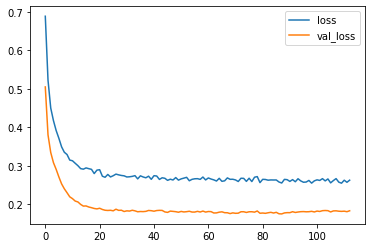

In [ ]:
#check training loss and validation logg for overfitting
#looks like our model working well
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1577
           1       0.94      0.93      0.93      1610

    accuracy                           0.93      3187
   macro avg       0.93      0.93      0.93      3187
weighted avg       0.93      0.93      0.93      3187



**we have better results from NN model compare to other two models but its very close to knearst classifier**

In [ ]:
#probability for the ANN model
model.predict_proba(x)

array([[0.99996644],
       [0.5396292 ],
       [0.5007621 ],
       ...,
       [0.00301939],
       [0.25202465],
       [0.07568565]], dtype=float32)

# Probability calculation

In [ ]:
#finding out the probability of lable=1

In [ ]:
dftest=pd.read_csv('exercise_02_test.csv')

In [ ]:
dftest

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,-18.919238,1.774657,2.216406,america,0.987554,34.396477,-55.883515,13.739194,2.824056,1.141799
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,33.878264,-1.027421,7.924785,asia,2.615088,15.038461,-13.110477,-13.018951,-5.069025,0.568757
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,-28.553940,1.755786,-0.325669,asia,-0.986222,-1.769850,-7.140415,0.791425,-3.224037,-0.816682
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,14.380384,-0.756253,5.930171,asia,-2.199690,-16.389740,-2.564346,-16.716012,5.559949,0.603007
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,-22.999896,-1.364063,1.207973,asia,1.694508,-4.086831,-28.709156,23.003355,-4.358594,1.929231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-11.222816,-30.626970,58.991811,0.401397,-6.735698,6.647318,-5.082310,4.345536,5.384552,-1.835131,...,13.127413,3.771388,-2.735344,asia,1.224840,6.624887,-34.474480,8.775300,5.180422,-1.393041
9996,-11.499750,-15.208325,9.735200,0.705614,-1.683272,-21.036041,13.915810,-8.038178,-1.497275,-3.215643,...,135.662872,5.285597,-0.194734,euorpe,1.185143,38.364908,9.031730,-18.614015,2.463580,2.555154
9997,30.593345,16.310727,7.145467,0.320570,-24.368449,10.918366,-1.102491,0.761505,4.984238,0.864588,...,-7.309901,-1.755134,-7.582438,asia,1.784907,-11.820404,19.663238,16.450237,18.993477,0.508249
9998,22.669325,4.404143,-41.708040,-0.739057,-12.889045,-21.016407,-4.315463,7.069085,4.114309,0.271119,...,-79.950778,1.558892,2.806693,asia,0.870775,-2.363894,5.375669,6.324780,0.024320,-0.971681


In [ ]:
#check for any categorical columns in df1
cols = dftest.columns
num_cols = dftest._get_numeric_data().columns
list(set(cols) - set(num_cols))

['x45', 'x34', 'x68', 'x93', 'x35', 'x41']

In [ ]:
#Cleaning the X34,35,68,93
print(dftest['x34'].unique())
print(dftest['x35'].unique())
print(dftest['x68'].unique())
print(dftest['x93'].unique())

['volkswagon' 'bmw' 'Toyota' 'tesla' 'Honda' 'chrystler' 'ford' 'nissan'
 nan 'chevrolet' 'mercades']
['wed' 'thurday' 'wednesday' 'thur' 'tuesday' 'friday' 'monday' 'fri']
['Aug' 'Jun' 'sept.' 'July' 'Apr' 'May' 'Oct' 'Nov' 'Mar' 'January' 'Dev'
 'Feb' nan]
['america' 'asia' 'euorpe' nan]


In [ ]:
dftest["x35"].replace({"wed": "wednesday", "thur": "thurday", "fri": "friday"}, inplace=True)

In [ ]:
dftest = pd.get_dummies(data = dftest, columns = ['x34', 'x35', 'x68', 'x93'])

In [ ]:
#removing dollar sign from column x41
dftest['x41'] = dftest['x41'].str.replace('$', '').astype(float)

In [ ]:
dftest['x45'] = dftest['x45'].str.replace('%', '').astype(float)

In [ ]:
# Check at first if we have any missing values
dftest.isnull().sum().sum()

176

In [ ]:
dftest.fillna(dftest.mean(), inplace=True)

In [ ]:
dftest.isnull().sum().sum()

0

In [ ]:
relevant_features.index.values

array(['x1', 'x2', 'x3', 'x5', 'x10', 'x20', 'x21', 'x22', 'x33', 'x37',
       'x40', 'x41', 'x45', 'x50', 'x51', 'x56', 'x58', 'x63', 'x66',
       'x69', 'x70', 'x72', 'x73', 'x75', 'x78', 'x79', 'x83', 'x85',
       'x96', 'x97', 'x99', 'dependent'], dtype=object)

In [ ]:
df2test = dftest[['x1', 'x2', 'x3', 'x5', 'x10', 'x20', 'x21', 'x22', 'x33', 'x37',
       'x40', 'x41', 'x45', 'x50', 'x51', 'x56', 'x58', 'x63', 'x66',
       'x69', 'x70', 'x72', 'x73', 'x75', 'x78', 'x79', 'x83', 'x85',
       'x96', 'x97', 'x99']]

In [ ]:
df2test

,x1,x2,x3,x5,x10,x20,x21,x22,x33,x37,...,x72,x73,x75,x78,x79,x83,x85,x96,x97,x99
0,54.479467,15.285444,-0.794648,-29.212209,72.390215,2.975753,5.103209,-59.107388,6.153179,-32.086998,...,2.317579,36.138153,80.851384,5.743085,12.317578,3.358217,10.211297,-55.883515,13.739194,1.141799
1,-20.244923,-18.084196,-1.113454,-4.025589,65.711033,4.486136,23.995539,24.797640,-5.280295,29.391786,...,5.297850,8.353935,-21.295879,-0.544251,2.399873,5.950392,20.238130,-13.110477,-13.018951,0.568757
2,-61.467354,14.943580,0.979055,-29.708041,90.438310,9.143171,-57.616974,-43.275370,3.526041,-30.329997,...,-7.591016,-4.399284,27.719905,-6.045367,4.351231,-1.105144,16.438294,-7.140415,0.791425,-0.816682
3,-18.454831,1.105534,-2.718771,2.252314,-43.284428,8.747259,-6.334656,48.633180,-3.051543,11.088216,...,3.419525,16.864636,-4.053955,2.595559,-9.223152,-5.203346,-12.050183,-2.564346,-16.716012,0.603007
4,15.810515,-17.972025,-1.995724,-15.899861,0.317012,47.448220,-9.378142,22.100129,9.049640,-21.955105,...,-4.029329,-31.872595,21.743536,-3.722035,4.915405,3.971766,17.245945,-28.709156,23.003355,1.929231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-30.626970,58.991811,0.401397,6.647318,9.943610,13.363441,-4.703320,27.014896,-1.410838,32.571079,...,-10.965044,30.324111,12.957945,-6.417189,-1.376996,-0.641675,1.853951,-34.474480,8.775300,-1.393041
9996,-15.208325,9.735200,0.705614,-21.036041,-10.303662,-3.407283,-23.849387,-24.176855,-0.031866,65.228156,...,-8.392947,-35.426111,33.440937,-2.299726,23.301768,-1.847732,0.883073,9.031730,-18.614015,2.555154
9997,16.310727,7.145467,0.320570,10.918366,-9.197691,-3.323142,40.422099,-40.071638,-8.943171,-2.316092,...,-6.879382,9.161562,6.073351,-1.784711,-58.597495,8.598494,-31.900233,19.663238,16.450237,0.508249
9998,4.404143,-41.708040,-0.739057,-21.016407,64.626297,16.078593,19.669888,28.352634,-1.842090,-42.531140,...,-0.102775,35.508177,26.801064,-4.229037,0.915377,0.865563,4.338038,5.375669,6.324780,-0.971681


In [ ]:
log_reg.classes_

array([0, 1], dtype=int64)

In [ ]:
knears_neighbors.classes_

array([0, 1], dtype=int64)

In [ ]:
#Normalization
sc=StandardScaler()
x=sc.fit_transform(df2test)

In [ ]:
l = []

for i in range(x.shape[0]):
    l.append(knears_neighbors.predict_proba(x[i].reshape(1, -1)).reshape(-1,1)[1][0])        
#     break
prob_df = pd.DataFrame({"prob": l})
prob_df.to_csv("results2.csv")